In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools as tools
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mzdy_inflace_cecilka.csv")
data

,rok,inflace,mzda
0,2024,10.7,45120
1,2023,15.1,41422
2,2022,3.8,38902
3,2021,3.2,36342
4,2020,2.8,34148
5,2019,2.1,33040
6,2018,2.5,31030
7,2017,0.7,29003
8,2016,0.3,26941


In [3]:
model = smf.ols(formula="mzda ~ rok + inflace", data=data).fit()

In [4]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   mzda   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     224.0
Date:                Fri, 16 May 2025   Prob (F-statistic):           2.31e-06
Time:                        22:04:22   Log-Likelihood:                -70.969
No. Observations:                   9   AIC:                             147.9
Df Residuals:                       6   BIC:                             148.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.012e+06   3.52e+05    -11.391      0.0

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


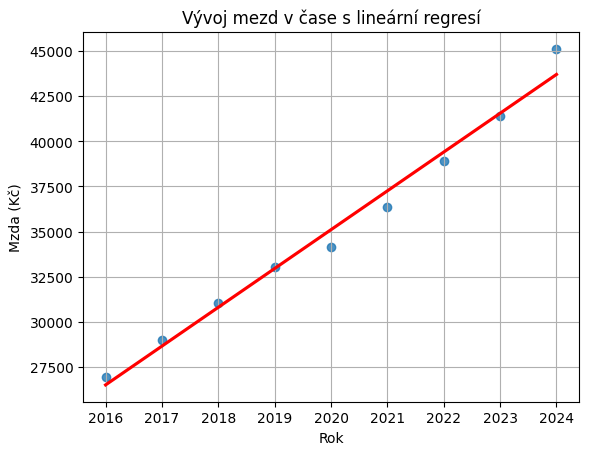

In [5]:
sns.regplot(data=data, x="rok", y="mzda", line_kws={"color": "red"}, ci=None)
plt.title("Vývoj mezd v čase s lineární regresí")
plt.xlabel("Rok")
plt.ylabel("Mzda (Kč)")
plt.grid()
plt.show()

In [ ]:
future = pd.DataFrame({
    "rok": [2025, 2026, 2027, 2028, 2029, 2030],
    "inflace": [2.5, 2.0, 2.0, 2.0, 2.0, 2.0]  # inflace na kterou cili CNB
    
})

In [7]:
future["predikovana_mzda"] = model.predict(future)
print(future)

    rok  inflace  predikovana_mzda
0  2025      2.5      44914.253391
1  2026      2.0      46867.616315
2  2027      2.0      48870.840945
3  2028      2.0      50874.065575
4  2029      2.0      52877.290206
5  2030      2.0      54880.514836


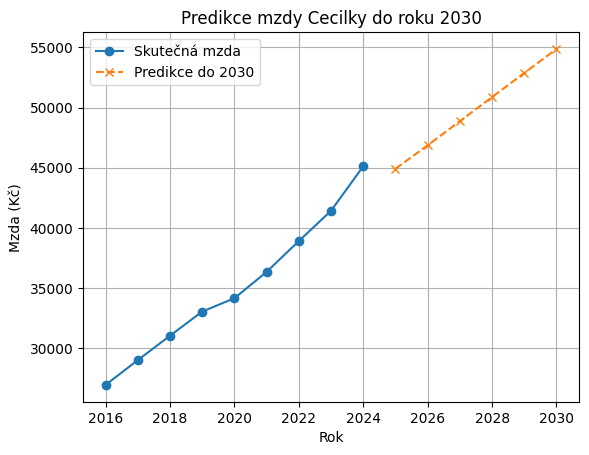

In [8]:
plt.plot(data["rok"], data["mzda"], marker='o', label="Skutečná mzda")
plt.plot(future["rok"], future["predikovana_mzda"], marker='x', linestyle='--', label="Predikce do 2030")
plt.xlabel("Rok")
plt.ylabel("Mzda (Kč)")
plt.title("Predikce mzdy Cecilky do roku 2030")
plt.legend()
plt.grid()
plt.show()